In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("SmartPartyWare1.csv")

| Variable Name             | Description                                                            |
|---------------------------|------------------------------------------------------------------------|
| Seq#                       | Sequence number in the partition                                       |
| ID#                        | Identification number in the full (partitioned) market test data set   |
| Gender                     | 0 = Male 1 = Female                                                   |
| M                          | Monetary—total money spent on Partyware                               |
| R                          | Recency—months since last purchase                                    |
| F                          | Frequency—total number of purchases                                   |
| FirstPurch                 | Months since first purchase                                           |
| Sports Party               | Number of purchases from the category: Sports Party                   |
| Pool Party                 | Number of purchases from the category: Pool Party                     |
| Barbeque Party             | Number of purchases from the category: Barbeque Party                 |
| Birthday Party             | Number of purchases from the category: Birthday Party                 |
| End-of-School-Term Party    | Number of purchases from the category: End-of-School-Year Party        |
| Art Party                  | Number of purchases from the category: Art Party                      |
| Block Party                | Number of purchases from the category: Block Party                    |
| Cooking Party              | Number of purchases from the category: Cooking Party                  |
| Get Together               | Number of purchases from the category: Get Together                   |
| Movie Night                | Number of purchases from the category: Movie Night                    |
| Success                    | =1 "Celebrating American Arts" was bought, = 0 if not                 |


# Dataset EDA

The target variable (Y) exhibits class imbalance, and all features used for prediction are numerical, eliminating the need for any transformations to categorical variables or the creation of dummy variables.

In [ ]:
#View dataframe and the distribution of the Response variable (Y)
print(df['Success'].value_counts())
df

Success
0    1783
1     217
Name: count, dtype: int64


,Seq#,ID#,Gender,M,R,F,FirstPurch,Sports Party,Pool Party,Barbeque Party,Birthday Party,End-of-School-Term Party,Art Party,Block Party,Cooking Party,Get Together,Movie Night,Success
0,1119,27240,1,260,16,2,18,0,0,1,0,1,0,0,0,0,0,0
1,1475,36588,0,259,12,5,30,1,0,1,0,0,1,1,0,0,0,0
2,345,8322,1,218,16,6,42,1,1,3,1,0,0,0,0,0,0,0
3,228,5367,1,143,14,1,14,0,0,0,1,0,0,0,0,0,0,0
4,390,9509,1,419,8,11,52,4,0,1,0,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1585,39424,1,191,10,1,10,0,0,0,0,0,0,0,0,0,0,0
1996,1091,26554,1,294,10,10,60,4,0,2,1,2,0,0,1,1,0,0
1997,344,8316,0,36,18,1,18,0,0,0,0,1,0,0,0,0,0,0
1998,979,23885,1,116,26,7,60,2,1,0,2,2,0,0,0,1,0,0


In [ ]:
#Some more info of the dataframe
print(df.info())
df.drop(columns=["Seq#", "ID#"]).describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Seq#                      2000 non-null   int64
 1   ID#                       2000 non-null   int64
 2   Gender                    2000 non-null   int64
 3   M                         2000 non-null   int64
 4   R                         2000 non-null   int64
 5   F                         2000 non-null   int64
 6   FirstPurch                2000 non-null   int64
 7   Sports Party              2000 non-null   int64
 8   Pool Party                2000 non-null   int64
 9   Barbeque Party            2000 non-null   int64
 10  Birthday Party            2000 non-null   int64
 11  End-of-School-Term Party  2000 non-null   int64
 12  Art Party                 2000 non-null   int64
 13  Block Party               2000 non-null   int64
 14  Cooking Party             2000 non-null 

,count,mean,std,min,25%,50%,75%,max
Gender,2000.0,0.7085,0.454567,0.0,0.00,1.0,1.00,1.0
M,2000.0,206.7890,101.336933,15.0,126.75,207.0,281.25,477.0
R,2000.0,13.5190,8.239696,2.0,8.00,12.0,16.00,36.0
F,2000.0,4.0055,3.547219,1.0,1.00,2.0,6.00,12.0
FirstPurch,2000.0,27.4175,18.740672,2.0,14.00,22.0,38.00,99.0
Sports Party,2000.0,0.7110,1.038758,0.0,0.00,0.0,1.00,6.0
Pool Party,2000.0,0.3140,0.614486,0.0,0.00,0.0,0.00,5.0
Barbeque Party,2000.0,0.7385,1.079213,0.0,0.00,0.0,1.00,8.0
Birthday Party,2000.0,0.3910,0.723451,0.0,0.00,0.0,1.00,5.0
End-of-School-Term Party,2000.0,0.2705,0.574887,0.0,0.00,0.0,0.00,4.0


Gender
1         1417
0          583
Name: count, dtype: int64


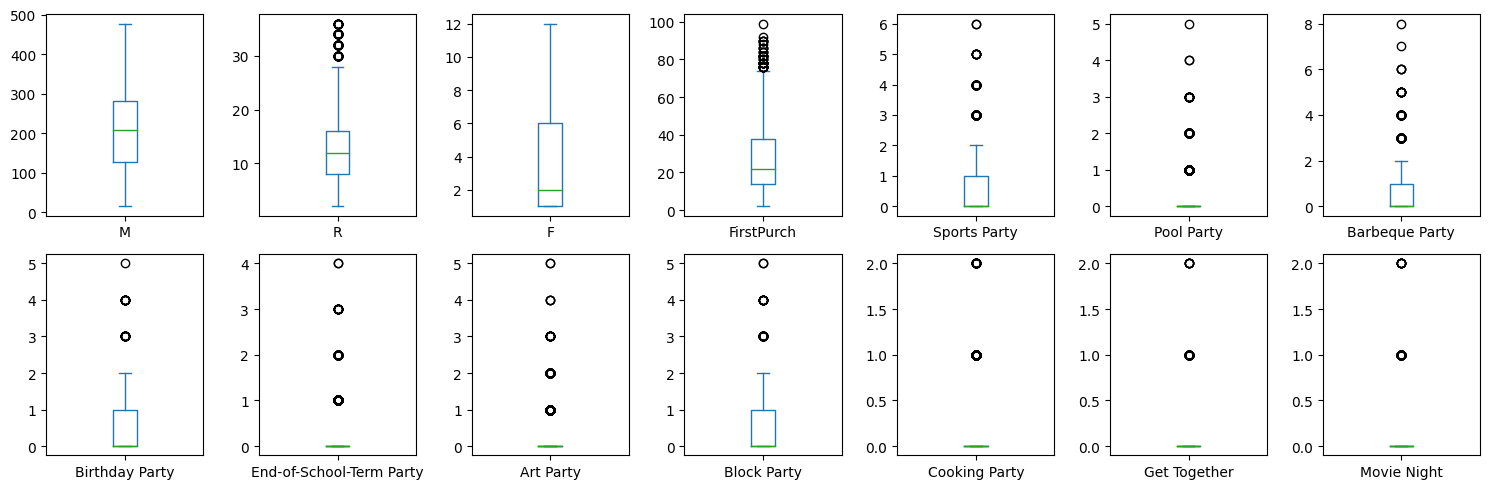

In [ ]:
# Visualize the distribution of numerical columns using boxplot.
# For binary columns, value counts provide sufficient insight into their distribution.
binomial_column=['Gender']
numerical_columns=['M', 'R', 'F', 'FirstPurch', 'Sports Party',
        'Pool Party', 'Barbeque Party', 'Birthday Party',
       'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party',
       'Get Together', 'Movie Night']
print(df[binomial_column].value_counts())
df[numerical_columns].plot(kind="box", subplots=True, layout=(2,7), figsize=(15, 5))
plt.tight_layout()
plt.show()

# Train Test Split

In [ ]:
X=df.drop(['Seq#', 'ID#', 'Success'], axis=1)
y=df['Success']
#Use Stratify split to address the class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=528, stratify=y)


# Functions to answer the questions

## show_tree(model, fea_names = X_train.columns):

In [ ]:
#function for visualization of tree for interpretation
def show_tree(model, fea_names = X_train.columns):
  plt.figure(figsize=(20,30))
  tree.plot_tree(model,
                 filled=True,
                 feature_names= fea_names,
                 class_names=True,
                 fontsize=9,
                 node_ids=True)
  plt.show()

  # tree_rules = tree.export_text(model, feature_names=list(X_train.columns))
  # print(tree_rules)

## prediction_evaluation(model, X=X_test, y=y_test)

Tree's Internal Mechanism (tree_default.predict()):

- A decision tree makes predictions based on the majority class at each leaf node. When you call predict(), the decision tree does not compute probabilities and then apply a 0.5 threshold. Instead, it assigns a class label based on the majority of training samples in the corresponding leaf.


In [ ]:
#function for evaluation matrics
def prediction_evaluation(model, X=X_test, y=y_test, cut_offs=[0.12, 0.15, 0.2, 0.25]):
  #Predict probabilities and internal prediction
  y_prob = model.predict_proba(X)[:,1]
  y_pred_internal = model.predict(X)

  #define sample size
  sasmple_size = len(y_test)
  customer_size = 500000
  #define cutoff
  evaluation = []

  #auc_roc is threshold-independent
  auc = roc_auc_score(y, y_prob)

  #evaluation base on threshold
  for i in cut_offs:
    y_pred_custom = (y_prob>=i).astype(int)
    evaluation.append({
        'Cutoff': i,
        'Recall': recall_score(y, y_pred_custom),
        'Accuracy': accuracy_score(y, y_pred_custom),
        'Precision': precision_score(y, y_pred_custom),
        'AUC_ROC': auc,
        'Confussion': confusion_matrix(y, y_pred_custom),
        'Profit': min(100000, (confusion_matrix(y, y_pred_custom)[0,1]+confusion_matrix(y, y_pred_custom)[1,1])/sasmple_size*customer_size)\
                  * (confusion_matrix(y, y_pred_custom)[1,1]/(confusion_matrix(y, y_pred_custom)[0,1]+confusion_matrix(y, y_pred_custom)[1,1])*45.5 \
                  - (1-confusion_matrix(y, y_pred_custom)[1,1]/(confusion_matrix(y, y_pred_custom)[0,1]+confusion_matrix(y, y_pred_custom)[1,1]))*4)
    })
  #evaluation base on internal prediction
  evaluation.append({
      'Cutoff': "Majority Vote",
      'Recall': recall_score(y, y_pred_internal),
      'Accuracy': accuracy_score(y, y_pred_internal),
      'Precision': precision_score(y, y_pred_internal),
      'AUC_ROC': auc,
      'Confussion': confusion_matrix(y, y_pred_internal),
      'Profit': min(100000, (confusion_matrix(y, y_pred_internal)[0,1]+confusion_matrix(y, y_pred_internal)[1,1])/sasmple_size*customer_size)\
                        * (confusion_matrix(y, y_pred_internal)[1,1]/(confusion_matrix(y, y_pred_internal)[0,1]+confusion_matrix(y, y_pred_internal)[1,1])*45.5 \
                        - (1-confusion_matrix(y, y_pred_internal)[1,1]/(confusion_matrix(y, y_pred_internal)[0,1]+confusion_matrix(y, y_pred_internal)[1,1]))*4)
  })

  evaluation_df = pd.DataFrame(evaluation)
  display(evaluation_df)

  n_nodes = model.tree_.node_count
  n_leaves = model.tree_.n_leaves
  print(f"Number of splits (nodes): {n_nodes}")
  print(f"Number of leaves: {n_leaves}")


## visualize_split(model, X=X_train)

In [ ]:
#function for examine the split
def visualize_split(model, X=X_train):
  feature_importances = pd.Series(model.feature_importances_, index=X.columns)
  feature_importances = feature_importances.sort_values(ascending=False)
  print(feature_importances)

  # Assuming 'feature_importances' is already calculated and sorted
  plt.figure(figsize=(10, 6))
  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='Blues_r')

  # Add labels and title
  plt.title('Feature Importances', fontsize=16)
  plt.xlabel('Importance Score', fontsize=12)
  plt.ylabel('Features', fontsize=12)

  # Display the plot
  plt.tight_layout()
  plt.show()



## make_confusion_matrix(model, cutoff=0.15, X_tr=X_train, X_ts=X_test, y_tr=y_train, y_ts =y_test)

In [ ]:
#Function for Confusion Matrix
def make_confusion_matrix(model, cutoff=0.15, X_tr=X_train, X_ts=X_test, y_tr=y_train, y_ts =y_test):
  # For Training Data
  y_prob_train = model.predict_proba(X_tr)[:, 1]
  y_pred_train_custom = (y_prob_train >= cutoff).astype(int)
  confusion_train = confusion_matrix(y_tr, y_pred_train_custom)
  group_counts_train = ["{0:0.0f}".format(value) for value in
                confusion_train.flatten()]
  group_percentages_train = ["{0:.2%}".format(value) for value in
                         confusion_train.flatten()/np.sum(confusion_train)]
  labels_train = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts_train,group_percentages_train)]
  labels_train = np.asarray(labels_train).reshape(2,2)

  # For Testing Data
  y_prob_test = model.predict_proba(X_ts)[:, 1]
  y_pred_test_custom = (y_prob_test >= cutoff).astype(int)
  confusion_test = confusion_matrix(y_ts, y_pred_test_custom)
  group_counts_test = ["{0:0.0f}".format(value) for value in
                confusion_test.flatten()]
  group_percentages_test = ["{0:.2%}".format(value) for value in
                         confusion_test.flatten()/np.sum(confusion_test)]
  labels_test = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts_test,group_percentages_test)]
  labels_test = np.asarray(labels_test).reshape(2,2)

  # Display confusion matrices
  print("Confusion Matrix for Training Data:")
  print(confusion_train)

  print("\nConfusion Matrix for Testing Data:")
  print(confusion_test)

  # Plot confusion matrices
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  sns.heatmap(confusion_train, annot=labels_train, fmt='', cmap='Blues', ax=ax[0])
  ax[0].set_title('Training Confusion Matrix')
  ax[0].set_xlabel('Predicted')
  ax[0].set_ylabel('Actual')

  sns.heatmap(confusion_test, annot=labels_test, fmt='', cmap='Blues', ax=ax[1])
  ax[1].set_title('Testing Confusion Matrix')
  ax[1].set_xlabel('Predicted')
  ax[1].set_ylabel('Actual')

  plt.tight_layout()
  plt.show()


## r_square(model, X_tr=X_train, X_ts=X_test, y_tr= y_train, y_ts = y_test

In [ ]:
#find r_square of model
def r_square(model, X_tr=X_train, X_ts=X_test, y_tr= y_train, y_ts = y_test):
  y_train_pred_proba = model.predict_proba(X_tr)[:,1]
  y_test_pred_proba = model.predict_proba(X_ts)[:,1]
  r2_train= r2_score(y_tr, y_train_pred_proba)
  r2_test= r2_score(y_ts, y_test_pred_proba)
  print(f"Training r-square is {r2_train:.4f}")
  print(f"Testing r-square is {r2_test:.4f}")

# Decision Tree (Default Setting)


The default settings of the DecisionTreeClassifier in the Scikit-learn package use Gini impurity as the criterion for splitting, which is explicitly specified here. By default, the classifier does not apply any pre-pruning techniques, such as limiting the number of splits or the depth of the tree. This often results in an overly complex tree that overfits the training data and performs poorly on the test data. We use this model as our baseline to guide further improvements

In [ ]:
tree_default = DecisionTreeClassifier(criterion="gini", random_state=1)
tree_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#Question

## 1. Provide calculations to show the Maximum profit based on the training data



Confusion matrix base on the training data with a tree in default setting

|               | Predicted Negative | Predicted Positive |
|---------------|--------------------|--------------------|
| **Actual Negative** | 1424               | 2                  |
| **Actual Positive** | 0                  | 174                |


In [ ]:

selling_price_per_product = 60.00
cost_per_product = 10.00
salvage_value_per_product = 15.00
cost_of_mailing_product = 4.50
cost_of_returning_product = 4.50
profit_per_product_sold = selling_price_per_product - cost_per_product - cost_of_mailing_product
loss_per_product_returned = salvage_value_per_product - cost_per_product - cost_of_mailing_product -cost_of_returning_product

package_upper_limit = 100_000

propensity_to_buy = 174/174+2
propensity_to_not_buy = 1-propensity_to_buy

Total_profit = package_upper_limit*propensity_to_buy*profit_per_product_sold+package_upper_limit*loss_per_product_returned*propensity_to_not_buy
print(f"The maximum total profit base on training data is ${Total_profit:.2f}. This is base on a overfitted prediction with unrealistic result")



The maximum total profit base on training data is $14450000.00. This is base on a overfitted prediction with unrealistic result


## 2. Provide calculations to show the profit based on the training data, if 100,000 packages are mailed randomly to members.

In [ ]:
# if package is mailed randomly, the ratio of propensity_to_buy equal to the ratio in sample
non_buyer_in_sample = 1783
buyer_in_sample=217

propensity_to_buy = buyer_in_sample/(buyer_in_sample+non_buyer_in_sample)
propensity_to_not_buy = 1-propensity_to_buy

Total_profit = package_upper_limit*propensity_to_buy*profit_per_product_sold+package_upper_limit*loss_per_product_returned*propensity_to_not_buy
print(f"The maximum total profit if ship randomly is ${Total_profit:.2f}.")
propensity_to_buy

The maximum total profit if ship randomly is $137075.00.


0.1085

## 3. Build a Decision Tree Model using Python with the following conditions:
- Y = Success \\
- X = All predictors \\
- Cutoff Probability for mailing = 0.15 \\
- These Questions are for your reference.



### a. Interpret the decision tree



The decision tree model trained using the Gini criterion splits the data at each node based on the feature that provides the greatest reduction in impurity. The root node splits on feature "R" with a threshold of 13.0, followed by further splits on variables like "Art Party" and "Gender" at various nodes. Leaf nodes with Gini values of 0 represent pure nodes where all samples belong to a single class. The overall model performance shows high accuracy but relatively low precision and recall, suggesting that while it performs well in identifying the majority class, it struggles with the minority class, which is our target class [y=1], due to class imbalance.

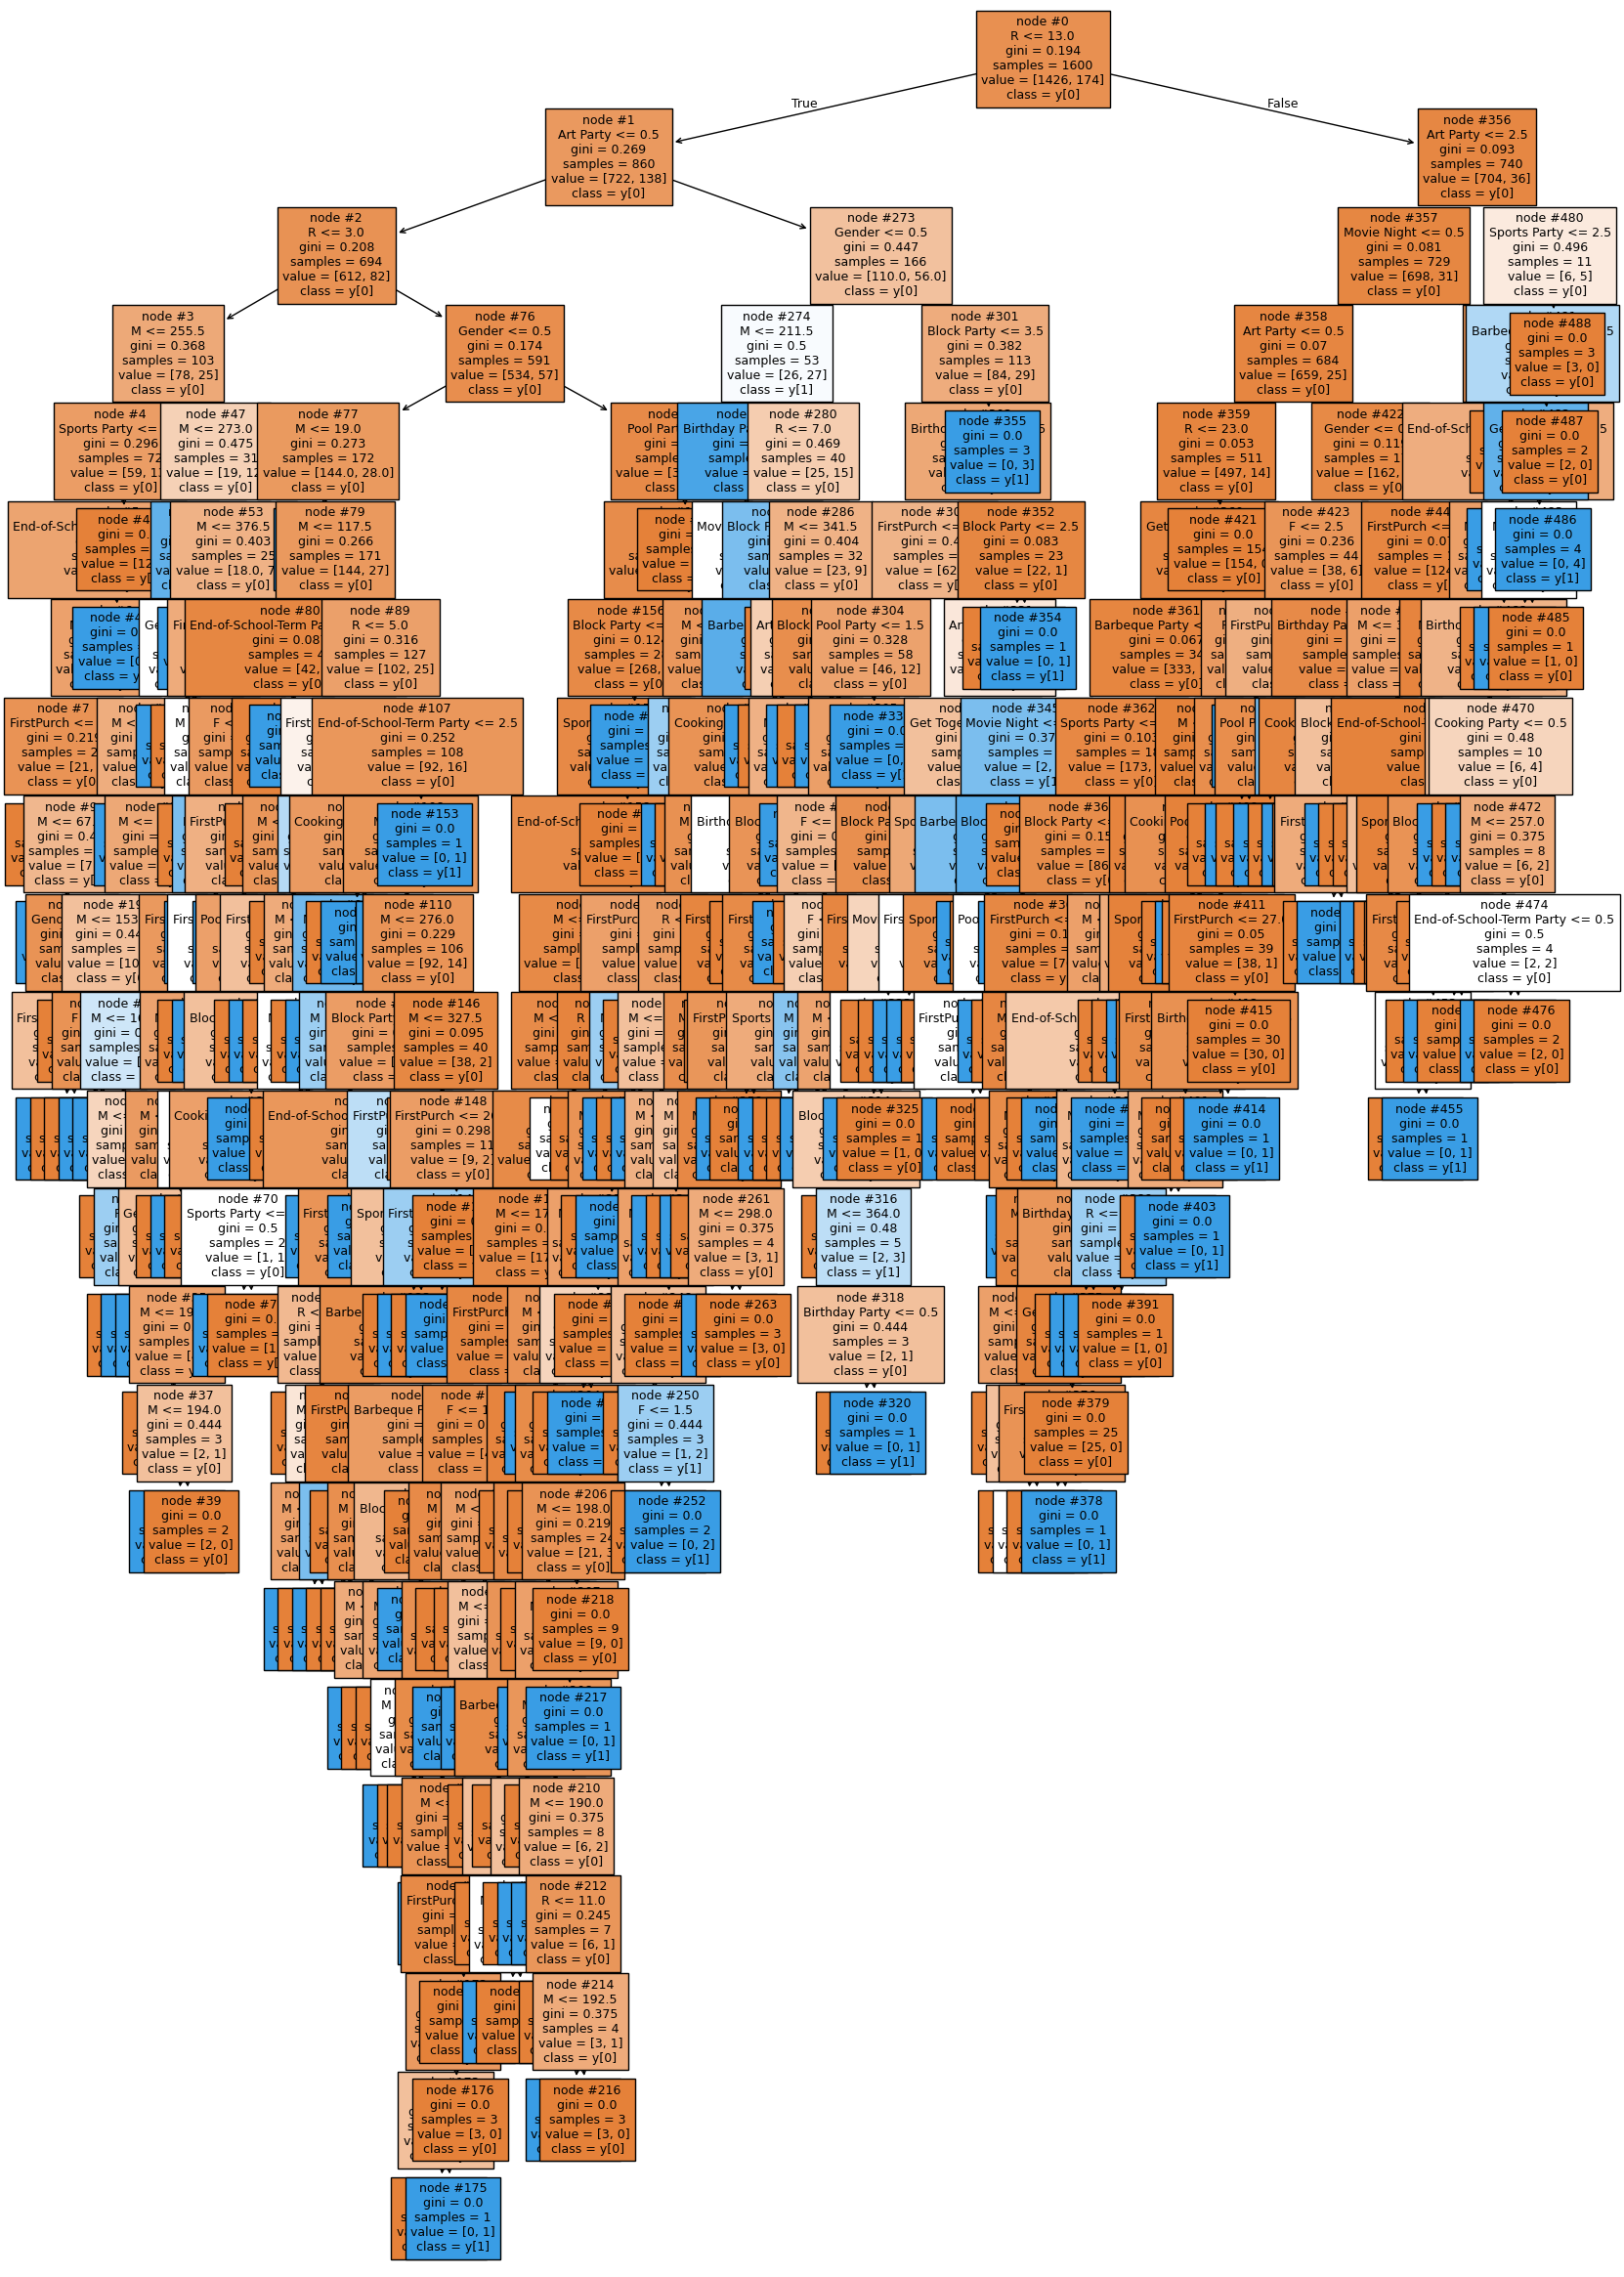

In [ ]:
show_tree(tree_default)

### b. Interpret evaluation metrics and how many splits did you have in the model?


The decision tree has 489 splits, and based on its performance on the testing data, there are clear signs of overfitting. While the model maintains a high accuracy of 80.5% across various thresholds, the low recall (0.279) and precision (0.203) scores indicate that the model struggles to generalize effectively to unseen data. Moreover, the AUC-ROC score of 0.572 suggests poor discrimination between classes, only slightly better than random guessing.

In [ ]:
prediction_evaluation(tree_default)

,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.12,0.279070,0.8050,0.203390,0.572178,"[[310, 47], [31, 12]]",447500.0
1,0.15,0.279070,0.8050,0.203390,0.572178,"[[310, 47], [31, 12]]",447500.0
2,0.2,0.279070,0.8050,0.203390,0.572178,"[[310, 47], [31, 12]]",447500.0
3,0.25,0.279070,0.8050,0.203390,0.572178,"[[310, 47], [31, 12]]",447500.0
4,Majority Vote,0.255814,0.8025,0.189655,0.572178,"[[310, 47], [32, 11]]",390625.0


Number of splits (nodes): 489
Number of leaves: 245


### c. Examine the first few split variables and explain whether they make business sense?



The first few split variables in the decision tree—Monetary (M), First Purchase (FirstPurch), Recency (R), and Block Party purchases—make strong business sense. Monetary value is a critical predictor, as customers who spend more are likely to engage in further purchases, making it a logical important feature. First purchase and recency are essential indicators of customer lifecycle and engagement, as recent or long-term customers may exhibit different buying behaviors. Splitting on specific categories, such as Block Party purchases, also makes sense, as it reflects customer preferences and potential interest in related products like "Celebrating American Arts." These variables are common in customer behavior models, aligning well with standard business practices for predicting future purchases.

M                           0.356978
FirstPurch                  0.117204
R                           0.105142
Block Party                 0.070512
Art Party                   0.070043
F                           0.051282
End-of-School-Term Party    0.038539
Gender                      0.038005
Birthday Party              0.033157
Sports Party                0.030983
Barbeque Party              0.023737
Cooking Party               0.022223
Movie Night                 0.017773
Pool Party                  0.017546
Get Together                0.006877
dtype: float64


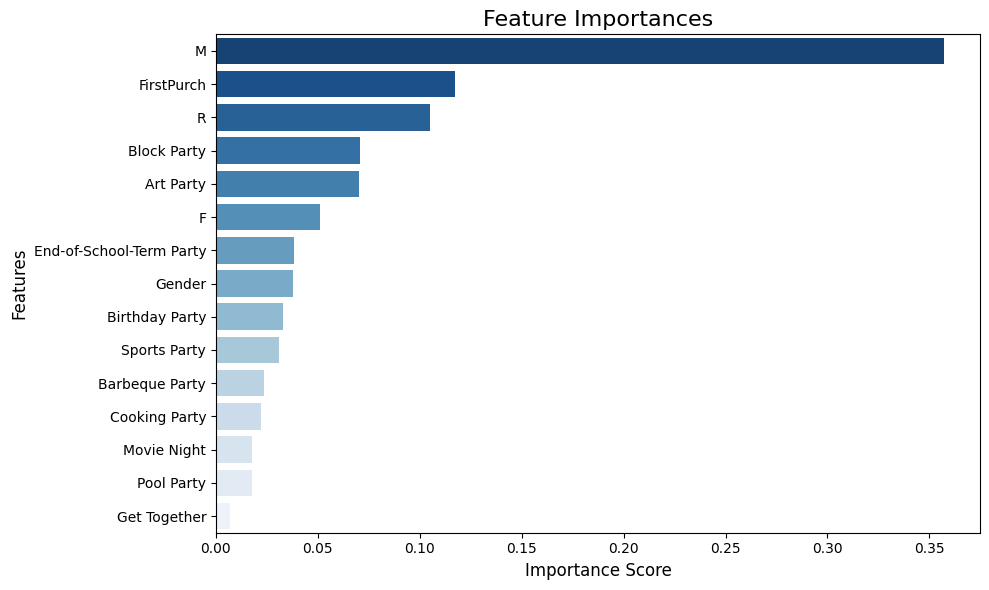

In [ ]:
visualize_split(tree_default)

### d. Create the confusion matrix for the training and testing data set. (cutoff Prob.= 0.15)


The model performs extremely well on the training data but has more difficulty generalizing to the test set, particularly in identifying class 1 instances. In the testing confusion matrix, the true positive is only 3%

Confusion Matrix for Training Data:
[[1424    2]
 [   0  174]]

Confusion Matrix for Testing Data:
[[310  47]
 [ 31  12]]


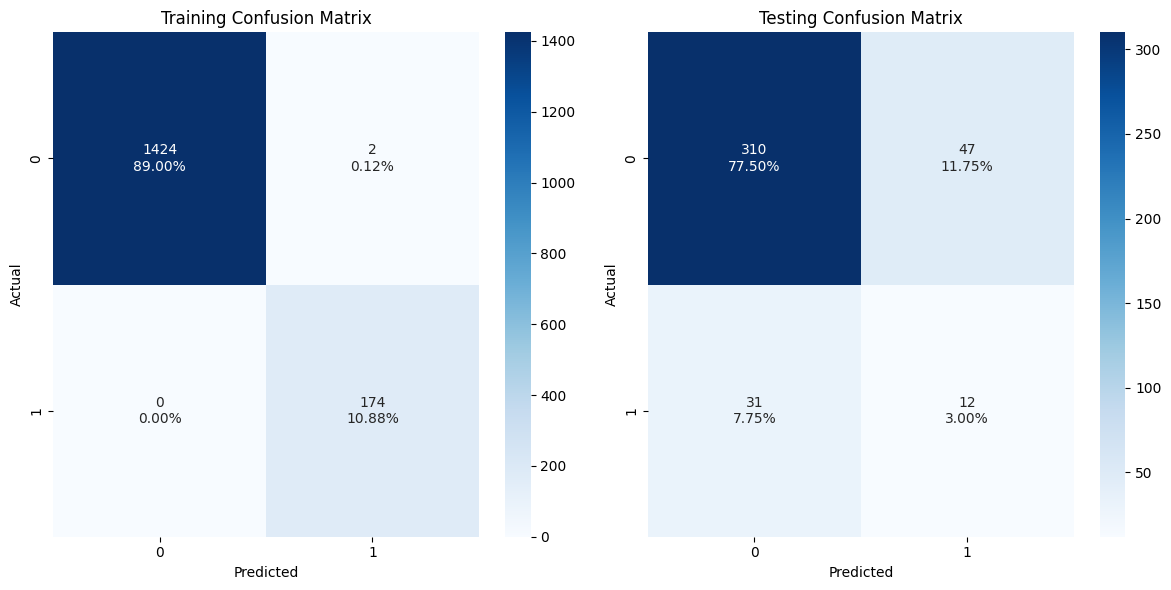

In [ ]:
make_confusion_matrix(tree_default, 0.15)

### e. What is the expected profit based on the confusion matrix for training and testing data sets (you can use the given profit calculator Excel Sheet).

In [ ]:
# The maximum total profit based on the training data (80% of all data) is $4493750
prediction_evaluation(tree_default, X_train, y_train, [0.15])

,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.15,1.000000,0.99875,0.988636,0.999992,"[[1424, 2], [0, 174]]",4493750.0
1,Majority Vote,0.988506,0.99875,1.000000,0.999992,"[[1426, 0], [2, 172]]",4550000.0


Number of splits (nodes): 489
Number of leaves: 245


In [ ]:
# The maximum total profit based on the test data (20% of all data) is $447500
prediction_evaluation(tree_default, X_test, y_test, [0.15])

,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.15,0.279070,0.8050,0.203390,0.572178,"[[310, 47], [31, 12]]",447500.0
1,Majority Vote,0.255814,0.8025,0.189655,0.572178,"[[310, 47], [32, 11]]",390625.0


Number of splits (nodes): 489
Number of leaves: 245


# 4. Build an improved Decision tree Model on the following conditions:
- Y = Success
- X = Any subset of predictors (you can enrich your predictors using transformation
or summation or other meaningful methods)
- Cutoff Probability for mailing = try a few values between 0.12 to 0.25 \\

These Questions are for your reference.


##Improved Trees

### Pre-pruning Trees (Parameters Tunning)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best Recall Score: 0.18369747899159664
Confusion Matrix for Training Data:
[[1215  211]
 [  34  140]]

Confusion Matrix for Testing Data:
[[285  72]
 [ 26  17]]


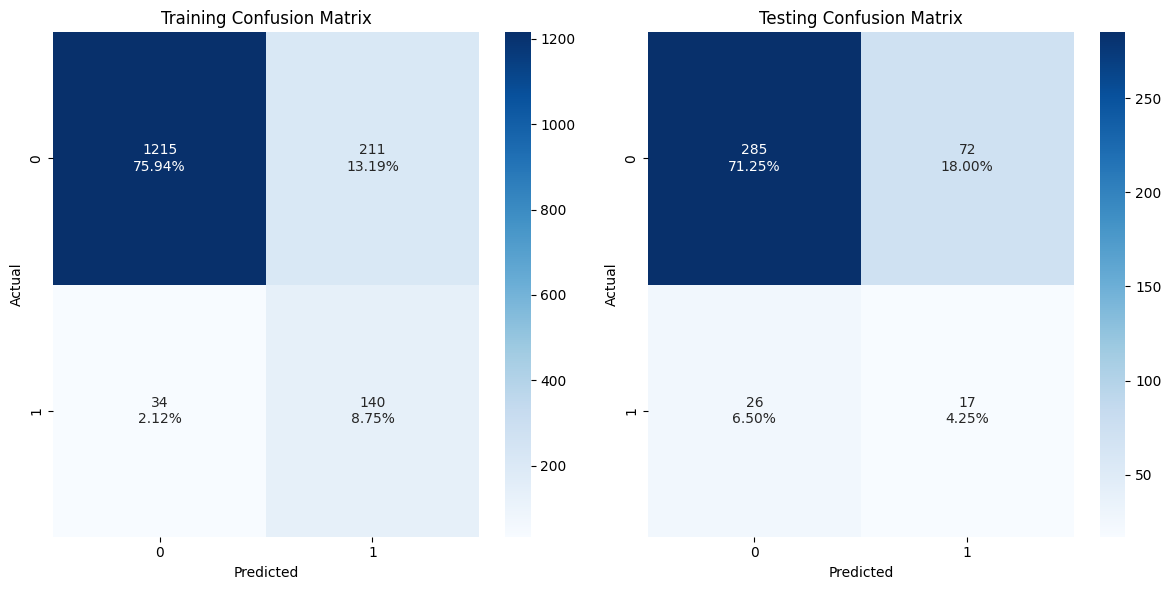

In [ ]:
#initiate a new tree
tree_pre_prune = DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': [3,4,5,6,7,8,9],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=tree_pre_prune,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='recall',  # Choose the scoring metric
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Recall Score: {grid_search.best_score_}")


best_pre_prune_model = grid_search.best_estimator_

make_confusion_matrix(best_pre_prune_model, 0.15)



### Post-pruning Tree

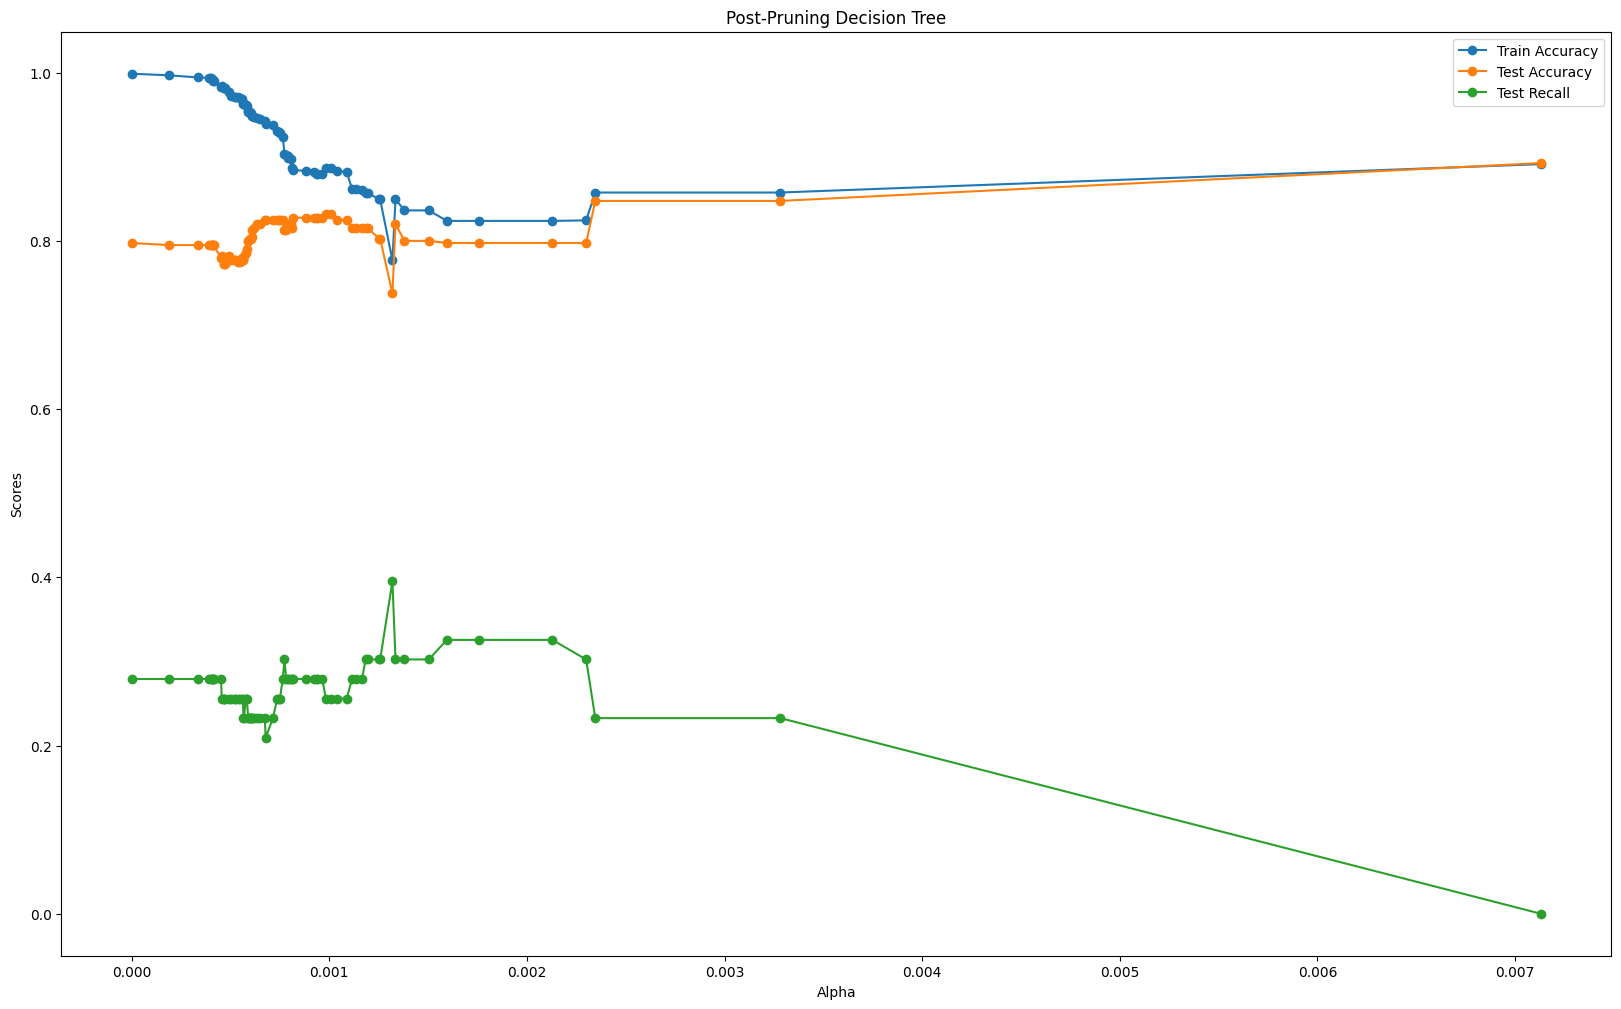

Optimal Alpha: 0.001319290758805244
Accuracy on the test set: 0.885


In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Initialize variables to store results
train_accuracy_scores = []
test_accuracy_scores = []
test_recall = []

# Iterate through the range of alpha values to prune the tree
for ccp_alpha in ccp_alphas:
    # Create a Decision Tree with the current alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)

    y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
    y_train_predict = (y_train_pred_proba >= 0.15).astype(int)
    y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
    y_test_predict = (y_test_pred_proba >= 0.15).astype(int)

    # Calculate cross-validated accuracy on the training and testing sets
    train_accuracy_scores.append(accuracy_score(y_train, y_train_predict))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_predict))
    test_recall.append(recall_score(y_test, y_test_predict))

# Plot the training and testing scores against alpha values
plt.figure(figsize=(20,12))
plt.plot(ccp_alphas, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(ccp_alphas, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.plot(ccp_alphas, test_recall, label='Test Recall', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Post-Pruning Decision Tree')
plt.legend()
plt.show()

# Find the alpha with the highest test score
optimal_alpha = ccp_alphas[np.argmax(test_recall)]
print(f'Optimal Alpha: {optimal_alpha}')

# Train the final model with the optimal alpha
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)
print(f'Accuracy on the test set: {pruned_tree.score(X_test, y_test)}')

Confusion Matrix for Training Data:
[[1133  293]
 [  64  110]]

Confusion Matrix for Testing Data:
[[278  79]
 [ 26  17]]


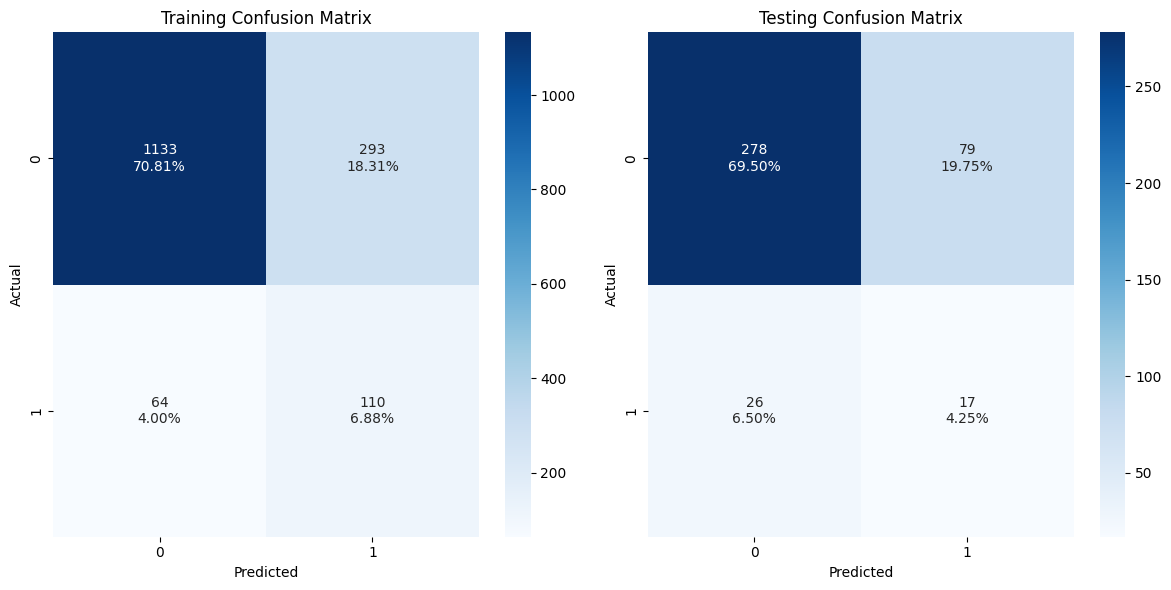

In [ ]:
make_confusion_matrix(pruned_tree)

### Pre-Pruning and Post-Pruning

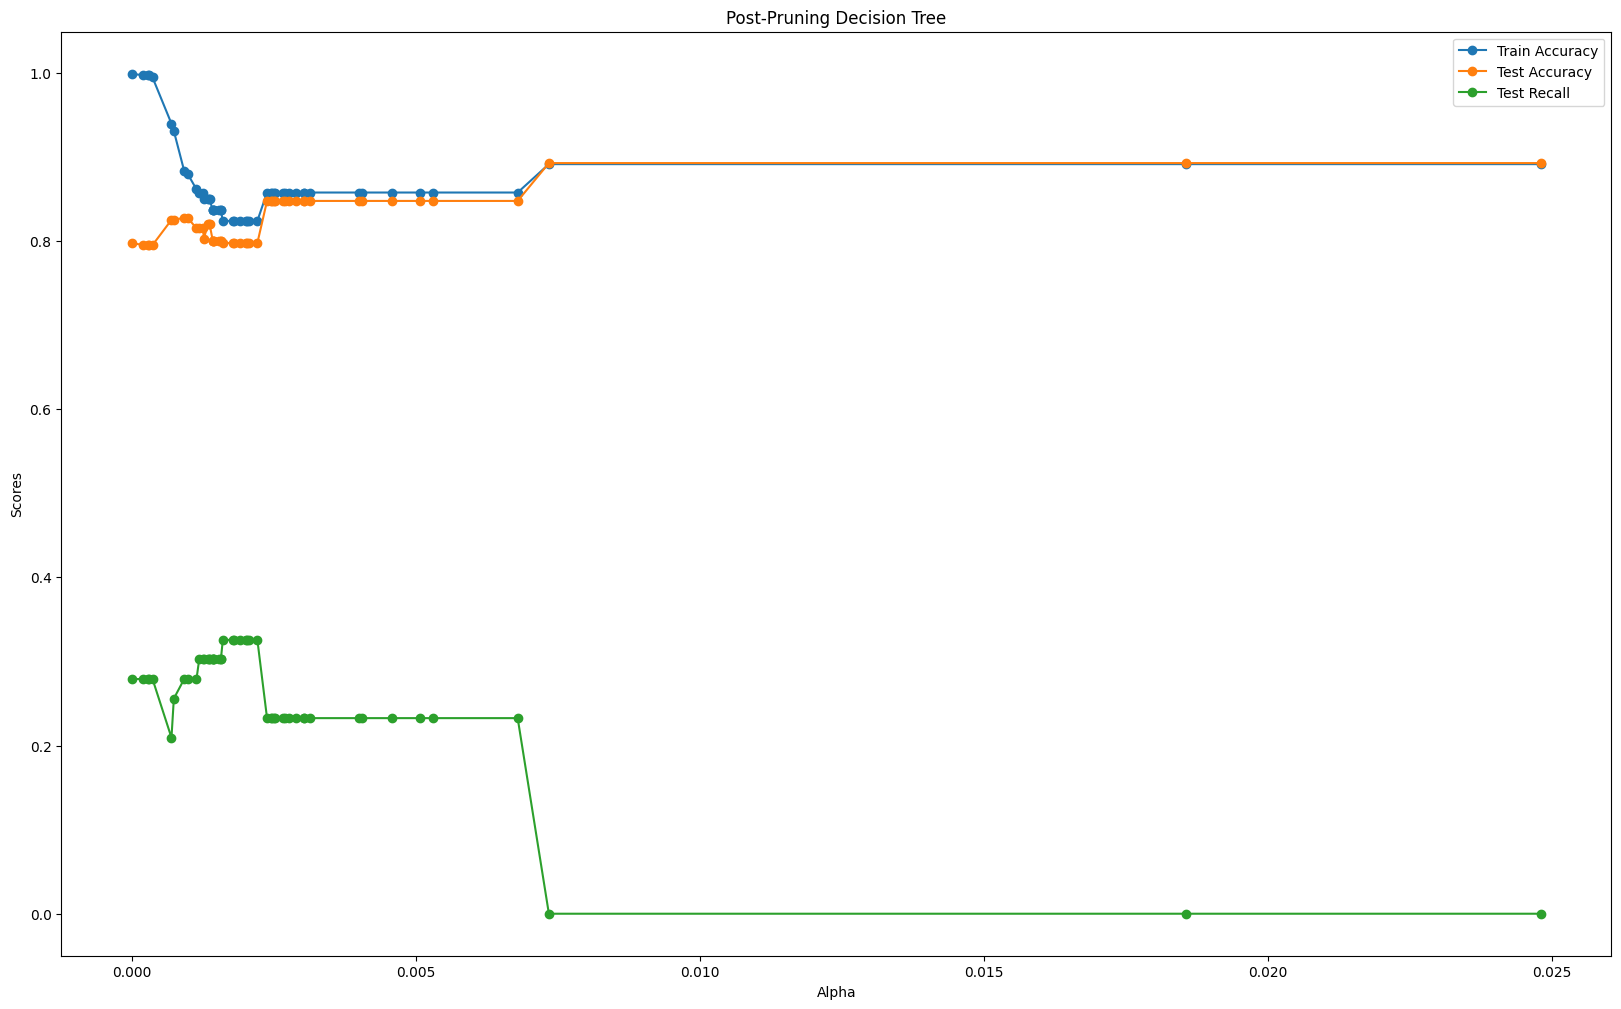

Optimal Alpha: 0.001603629001428861
Accuracy on the test set: 0.89


In [ ]:
# Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}
clf = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=9,
                                         max_features= None, min_samples_leaf=6, min_samples_split=2)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Initialize variables to store results
train_accuracy_scores = []
test_accuracy_scores = []
test_recall = []

# Iterate through the range of alpha values to prune the tree
for ccp_alpha in ccp_alphas:
    # Create a Decision Tree with the current alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)

    y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
    y_train_predict = (y_train_pred_proba >= 0.15).astype(int)
    y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
    y_test_predict = (y_test_pred_proba >= 0.15).astype(int)

    # Calculate cross-validated accuracy on the training and testing sets
    train_accuracy_scores.append(accuracy_score(y_train, y_train_predict))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_predict))
    test_recall.append(recall_score(y_test, y_test_predict))

# Plot the training and testing scores against alpha values
plt.figure(figsize=(20,12))
plt.plot(ccp_alphas, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(ccp_alphas, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.plot(ccp_alphas, test_recall, label='Test Recall', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Post-Pruning Decision Tree')
plt.legend()
plt.show()

# Find the alpha with the highest test score
optimal_alpha = ccp_alphas[np.argmax(test_recall)]
print(f'Optimal Alpha: {optimal_alpha}')

# Train the final model with the optimal alpha
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)
print(f'Accuracy on the test set: {pruned_tree.score(X_test, y_test)}')

Confusion Matrix for Training Data:
[[1232  194]
 [  88   86]]

Confusion Matrix for Testing Data:
[[305  52]
 [ 29  14]]


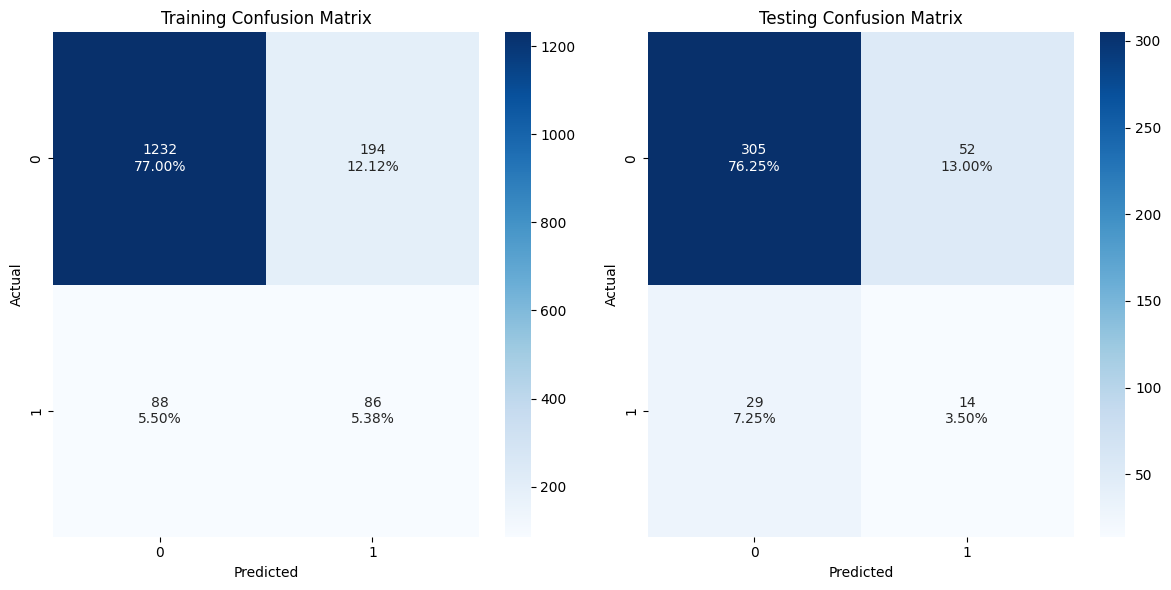

In [ ]:
make_confusion_matrix(pruned_tree)

### Feature Engineered and Post Prune (Optimal Model) Q4


In [ ]:
df_eng = df.copy()
df_eng.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Sports Party',
       'Pool Party', 'Barbeque Party', 'Birthday Party',
       'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party',
       'Get Together', 'Movie Night', 'Success'],
      dtype='object')

In [ ]:
party_list = ['Sports Party',
       'Pool Party', 'Barbeque Party', 'Birthday Party',
       'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party',
       'Get Together', 'Movie Night']

for party in party_list:
  df_eng[party + ' Ratio'] = (df_eng[party] / df_eng['F']).round(4)

In [ ]:
df_eng['Total_purchase'] = df_eng[party_list].sum(axis=1)

In [ ]:
df_eng['R_segment'] = pd.qcut(df_eng['R'], q=3, labels=False)
df_eng['F_segment'] = pd.qcut(df_eng['F'], q=3, labels=False)
df_eng['M_segment'] = pd.qcut(df_eng['M'], q=3, labels=False)
df_eng['RFM_Segment'] = df_eng['R_segment'].astype(str) + df_eng['F_segment'].astype(str) + df_eng['M_segment'].astype(str)

# Step 1: Calculate the mean of the target variable for each category
target_mean = df_eng.groupby('RFM_Segment')['Success'].mean()

# Step 2: Map the target mean to each category in the original DataFrame
df_eng['RFM_Segment_Encoded'] = df_eng['RFM_Segment'].map(target_mean)

In [ ]:
df_eng['Party_Variety'] = df_eng[['Sports Party', 'Pool Party', 'Barbeque Party', 'Birthday Party',
                          'End-of-School-Term Party', 'Art Party', 'Block Party',
                          'Cooking Party', 'Get Together', 'Movie Night']].gt(0).sum(axis=1)


In [ ]:
df_eng['FirstPurch/F'] = df_eng['FirstPurch']/df_eng['F']

In [ ]:
df_eng.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Sports Party',
       'Pool Party', 'Barbeque Party', 'Birthday Party',
       'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party',
       'Get Together', 'Movie Night', 'Success', 'Sports Party Ratio',
       'Pool Party Ratio', 'Barbeque Party Ratio', 'Birthday Party Ratio',
       'End-of-School-Term Party Ratio', 'Art Party Ratio',
       'Block Party Ratio', 'Cooking Party Ratio', 'Get Together Ratio',
       'Movie Night Ratio', 'Total_purchase', 'R_segment', 'F_segment',
       'M_segment', 'RFM_Segment', 'RFM_Segment_Encoded', 'Party_Variety',
       'FirstPurch/F'],
      dtype='object')

In [ ]:
# Define X and y
X_eng = df_eng[['Gender', 'M', 'R', 'F', 'FirstPurch', 'Sports Party',
       'Pool Party', 'Barbeque Party', 'Birthday Party',
       'End-of-School-Term Party', 'Art Party', 'Block Party', 'Cooking Party',
       'Get Together', 'Movie Night', 'Total_purchase',
       'Sports Party Ratio', 'Pool Party Ratio', 'Barbeque Party Ratio',
       'Birthday Party Ratio', 'End-of-School-Term Party Ratio',
       'Art Party Ratio', 'Block Party Ratio', 'Cooking Party Ratio',
       'Get Together Ratio', 'Movie Night Ratio', 'R_segment', 'F_segment',
       'M_segment', 'RFM_Segment_Encoded', 'Party_Variety',
       'FirstPurch/F']]
y_eng = df_eng['Success']

1. Scikit-learn: SequentialFeatureSelector
Description: Scikit-learn provides a native implementation of Sequential Feature Selection (SFS), which supports both forward and backward feature selection. It allows any model to be plugged in for feature evaluation.
Advantages:
Easily integrates with all Scikit-learn models.
Supports cross-validation for robust selection.
Flexible (works with any model for evaluation).
Disadvantages:
Can be slow for large datasets due to its iterative nature.
May not always find the optimal set of features, especially for complex feature interactions.
When to use: When you want a simple and flexible implementation of forward feature selection with your preferred model, and performance is not the top priority.
Best for: Small to medium datasets and cases where a custom model (like a specific machine learning algorithm) is required for feature evaluation.
2. mlxtend: SequentialFeatureSelector (SFS)
Description: The mlxtend library also provides Sequential Feature Selector (SFS), which is similar to the Scikit-learn version but offers more flexibility. It allows both forward and backward selection, and supports floating selection, which enables adding and removing features dynamically.
Advantages:
Floating selection, which may lead to better feature subsets by dynamically adding/removing features.
More customizable in terms of settings (e.g., floating, verbose).
Works with any model from Scikit-learn or custom models.
Disadvantages:
Computationally expensive for larger datasets or many features.
When to use: When you need a flexible, robust method for feature selection, particularly when you expect feature interactions or need floating selection.
Best for: Small to medium datasets, cases where floating selection might improve performance, and scenarios requiring flexibility in feature selection.
3. Scikit-learn: Recursive Feature Elimination (RFE)
Description: RFE recursively eliminates the least important features by ranking feature importance based on the trained model, removing the weakest features one by one.
Advantages:
Can capture feature importance efficiently.
Often better for selecting features that interact with each other.
Computationally faster than sequential methods for large datasets.
Disadvantages:
May remove some important features prematurely, especially in datasets with complex interactions.
Requires the underlying model to be strong in feature ranking (e.g., decision trees, support vector machines).
When to use: When you want to use an efficient, recursive approach for feature selection, especially with models that handle feature importance well, such as decision trees or linear models.
Best for: Large datasets where efficiency is critical, or when using models like Random Forests, SVMs, or linear models.
4. Random Forest-based Feature Selection (Scikit-learn or Boruta)
Description: Random Forests provide built-in feature importance based on how features contribute to the decision-making process in the ensemble of trees. Boruta is an extension that leverages Random Forests to perform all-relevant feature selection.
Advantages:
Handles large datasets and many features effectively.
Captures non-linear interactions between features.
Robust against overfitting and noise in data.
Boruta adds an extra layer by comparing features against random permutations (shadow features), making it highly robust.
Disadvantages:
Random Forest feature importance can be biased towards features with more categories or continuous variables.
Boruta can be slow on very large datasets due to its iterative nature.
When to use: When you want to select features using a powerful model like Random Forest, especially if there are complex, non-linear interactions between features.
Best for: Large datasets, problems where feature interactions are important, and when you need a robust method to select all relevant features (Boruta).

In [ ]:
# model = LogisticRegression()
# model = DecisionTreeClassifier(random_state = 42)
model = RandomForestClassifier(n_estimators = 5, random_state = 42)

# Perform forward feature selection
sfs = SFS(model,
          k_features=15,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5)

# Fit the SFS model to the data using the selected features
sfs = sfs.fit(X_eng, y_eng)

final_features = list(sfs.k_feature_names_)
print("Final Features:", final_features)


[2024-09-25 05:00:02] Features: 1/15 -- score: 0.8925000000000001
[2024-09-25 05:00:05] Features: 2/15 -- score: 0.8935000000000001
[2024-09-25 05:00:07] Features: 3/15 -- score: 0.893
[2024-09-25 05:00:09] Features: 4/15 -- score: 0.8935000000000001
[2024-09-25 05:00:13] Features: 5/15 -- score: 0.893
[2024-09-25 05:00:15] Features: 6/15 -- score: 0.8925000000000001
[2024-09-25 05:00:17] Features: 7/15 -- score: 0.893
[2024-09-25 05:00:19] Features: 8/15 -- score: 0.889
[2024-09-25 05:00:21] Features: 9/15 -- score: 0.889
[2024-09-25 05:00:23] Features: 10/15 -- score: 0.8865000000000001
[2024-09-25 05:00:25] Features: 11/15 -- score: 0.8879999999999999
[2024-09-25 05:00:28] Features: 12/15 -- score: 0.8875
[2024-09-25 05:00:30] Features: 13/15 -- score: 0.8794999999999998
[2024-09-25 05:00:32] Features: 14/15 -- score: 0.8799999999999999

Final Features: ['Pool Party', 'Birthday Party', 'Block Party', 'Cooking Party', 'Get Together', 'Movie Night', 'Sports Party Ratio', 'Barbeque Party Ratio', 'Cooking Party Ratio', 'Get Together Ratio', 'Movie Night Ratio', 'R_segment', 'F_segment', 'M_segment', 'RFM_Segment_Encoded']



[2024-09-25 05:00:33] Features: 15/15 -- score: 0.8809999999999999

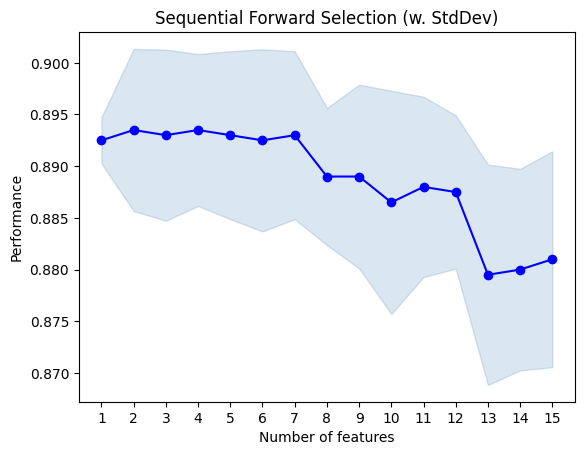

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.ylabel('Performance')
plt.xlabel('Number of features')
plt.show()

In [ ]:
X_eng_selected = df_eng[final_features]

In [ ]:
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng_selected, y_eng, test_size=0.2, random_state=528, stratify=y)

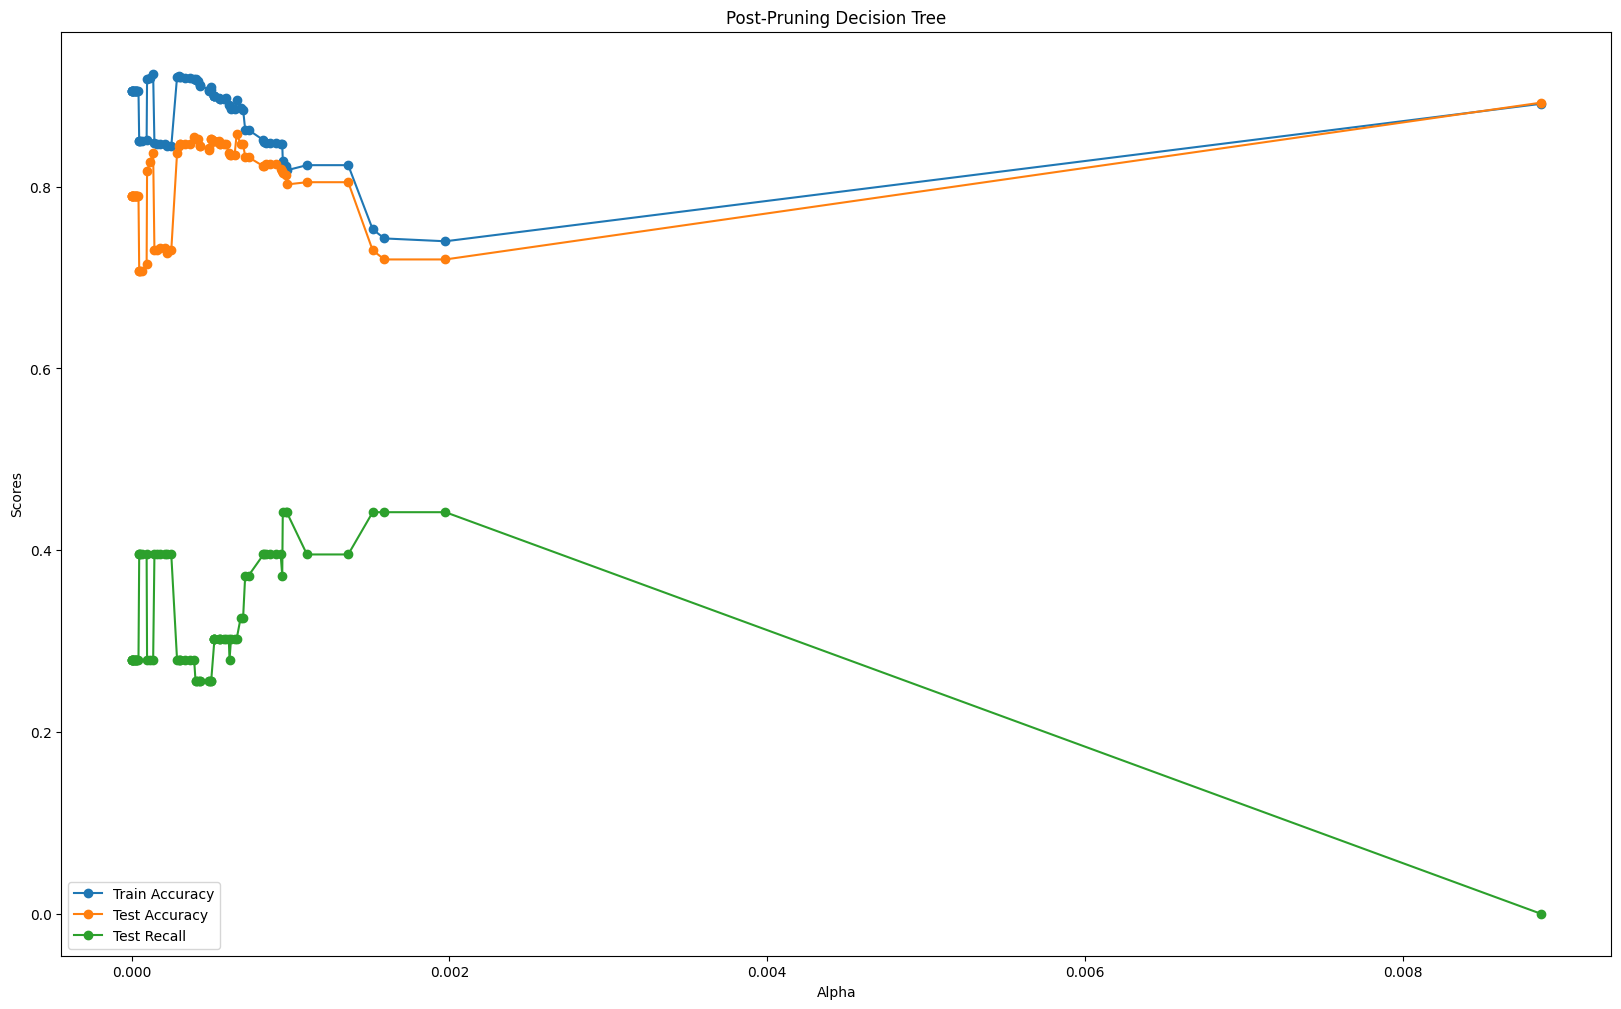

Optimal Alpha: 0.0009509033896672922
Accuracy on the test set: 0.8975


In [ ]:
# Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_eng, y_train_eng)
ccp_alphas = path.ccp_alphas

# Initialize variables to store results
train_accuracy_scores = []
test_accuracy_scores = []
test_recall = []

# Iterate through the range of alpha values to prune the tree
for ccp_alpha in ccp_alphas:
    # Create a Decision Tree with the current alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_eng, y_train_eng)

    y_train_pred_proba = clf.predict_proba(X_train_eng)[:, 1]
    y_train_predict = (y_train_pred_proba >= 0.15).astype(int)
    y_test_pred_proba = clf.predict_proba(X_test_eng)[:, 1]
    y_test_predict = (y_test_pred_proba >= 0.15).astype(int)

    # Calculate cross-validated accuracy on the training and testing sets
    train_accuracy_scores.append(accuracy_score(y_train_eng, y_train_predict))
    test_accuracy_scores.append(accuracy_score(y_test_eng, y_test_predict))
    test_recall.append(recall_score(y_test_eng, y_test_predict))

# Plot the training and testing scores against alpha values
plt.figure(figsize=(20,12))
plt.plot(ccp_alphas, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(ccp_alphas, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.plot(ccp_alphas, test_recall, label='Test Recall', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.title('Post-Pruning Decision Tree')
plt.legend()
plt.show()

# Find the alpha with the highest test score
optimal_alpha = ccp_alphas[np.argmax(test_recall)]
print(f'Optimal Alpha: {optimal_alpha}')

# Train the final model with the optimal alpha
best_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
best_tree.fit(X_train_eng, y_train_eng)
print(f'Accuracy on the test set: {best_tree.score(X_test_eng, y_test_eng)}')

In [ ]:
prediction_evaluation(best_tree, X_test_eng, y_test_eng, [round(x, 2) for x in np.arange(0.12, 0.26, 0.01)])

,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.12,0.465116,0.8150,0.281690,0.693766,"[[306, 51], [23, 20]]",882500.0
1,0.13,0.441860,0.8150,0.275362,0.693766,"[[307, 50], [24, 19]]",830625.0
2,0.14,0.441860,0.8150,0.275362,0.693766,"[[307, 50], [24, 19]]",830625.0
3,0.15,0.441860,0.8150,0.275362,0.693766,"[[307, 50], [24, 19]]",830625.0
4,0.16,0.441860,0.8150,0.275362,0.693766,"[[307, 50], [24, 19]]",830625.0
5,0.17,0.441860,0.8150,0.275362,0.693766,"[[307, 50], [24, 19]]",830625.0
6,0.18,0.302326,0.8400,0.276596,0.693766,"[[323, 34], [30, 13]]",569375.0
7,0.19,0.302326,0.8400,0.276596,0.693766,"[[323, 34], [30, 13]]",569375.0
8,0.2,0.302326,0.8400,0.276596,0.693766,"[[323, 34], [30, 13]]",569375.0
9,0.21,0.279070,0.8375,0.260870,0.693766,"[[323, 34], [31, 12]]",512500.0


Number of splits (nodes): 49
Number of leaves: 25


In [ ]:
prediction_evaluation(best_tree, X_train_eng, y_train_eng, [round(x, 2) for x in np.arange(0.12, 0.26, 0.01)])

,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.12,0.534483,0.825000,0.318493,0.763064,"[[1227, 199], [81, 93]]",1.176541e+06
1,0.13,0.528736,0.828750,0.323944,0.763064,"[[1234, 192], [82, 92]]",1.203521e+06
2,0.14,0.528736,0.828750,0.323944,0.763064,"[[1234, 192], [82, 92]]",1.203521e+06
3,0.15,0.528736,0.828750,0.323944,0.763064,"[[1234, 192], [82, 92]]",1.203521e+06
4,0.16,0.528736,0.828750,0.323944,0.763064,"[[1234, 192], [82, 92]]",1.203521e+06
5,0.17,0.528736,0.828750,0.323944,0.763064,"[[1234, 192], [82, 92]]",1.203521e+06
6,0.18,0.442529,0.863750,0.388889,0.763064,"[[1305, 121], [97, 77]]",1.525000e+06
7,0.19,0.442529,0.863750,0.388889,0.763064,"[[1305, 121], [97, 77]]",1.525000e+06
8,0.2,0.442529,0.863750,0.388889,0.763064,"[[1305, 121], [97, 77]]",1.525000e+06
9,0.21,0.436782,0.865625,0.393782,0.763064,"[[1309, 117], [98, 76]]",1.549223e+06


Number of splits (nodes): 49
Number of leaves: 25


Confusion Matrix for Training Data:
[[1227  199]
 [  81   93]]

Confusion Matrix for Testing Data:
[[306  51]
 [ 23  20]]


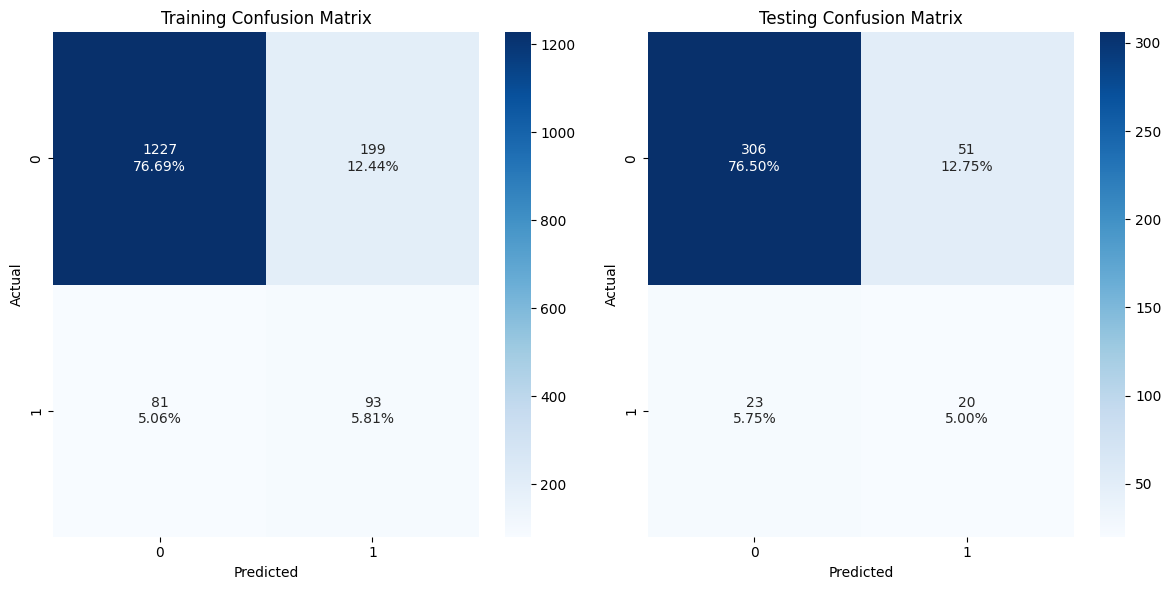

In [ ]:
make_confusion_matrix(best_tree, 0.12, X_train_eng, X_test_eng,y_train_eng, y_test_eng)

In [ ]:
feature_names = list(X_eng_selected.columns)

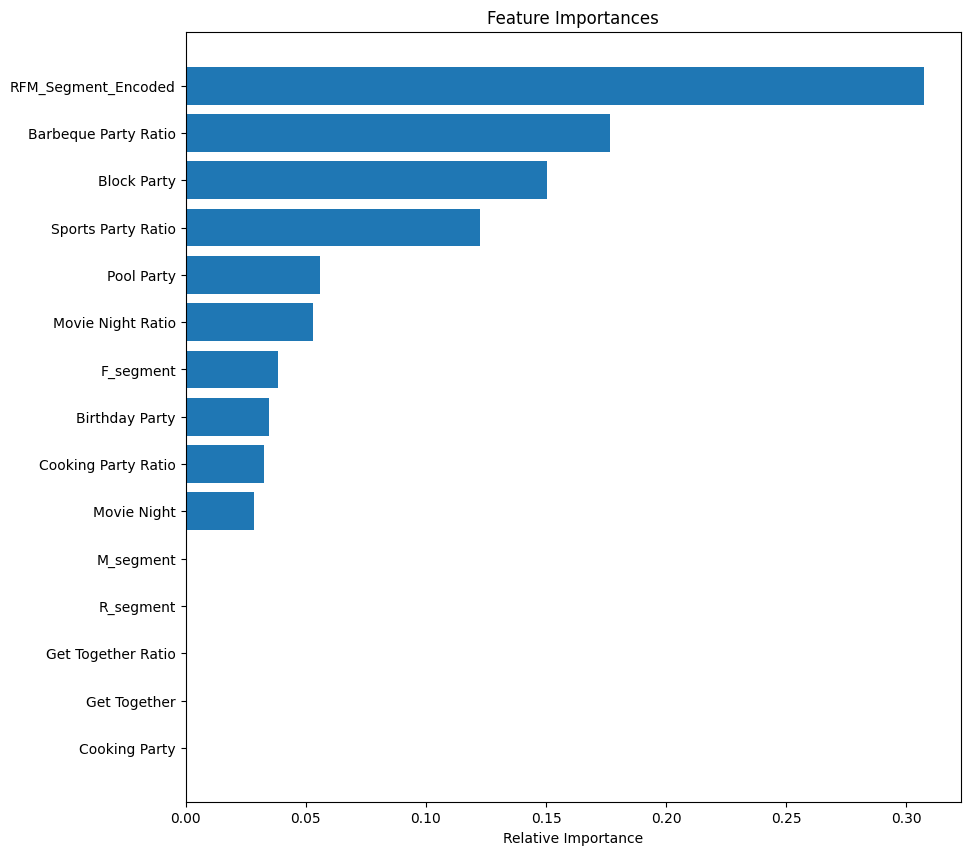

In [ ]:
importances = best_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Question (con't)


### a. Interpret the decision tree?


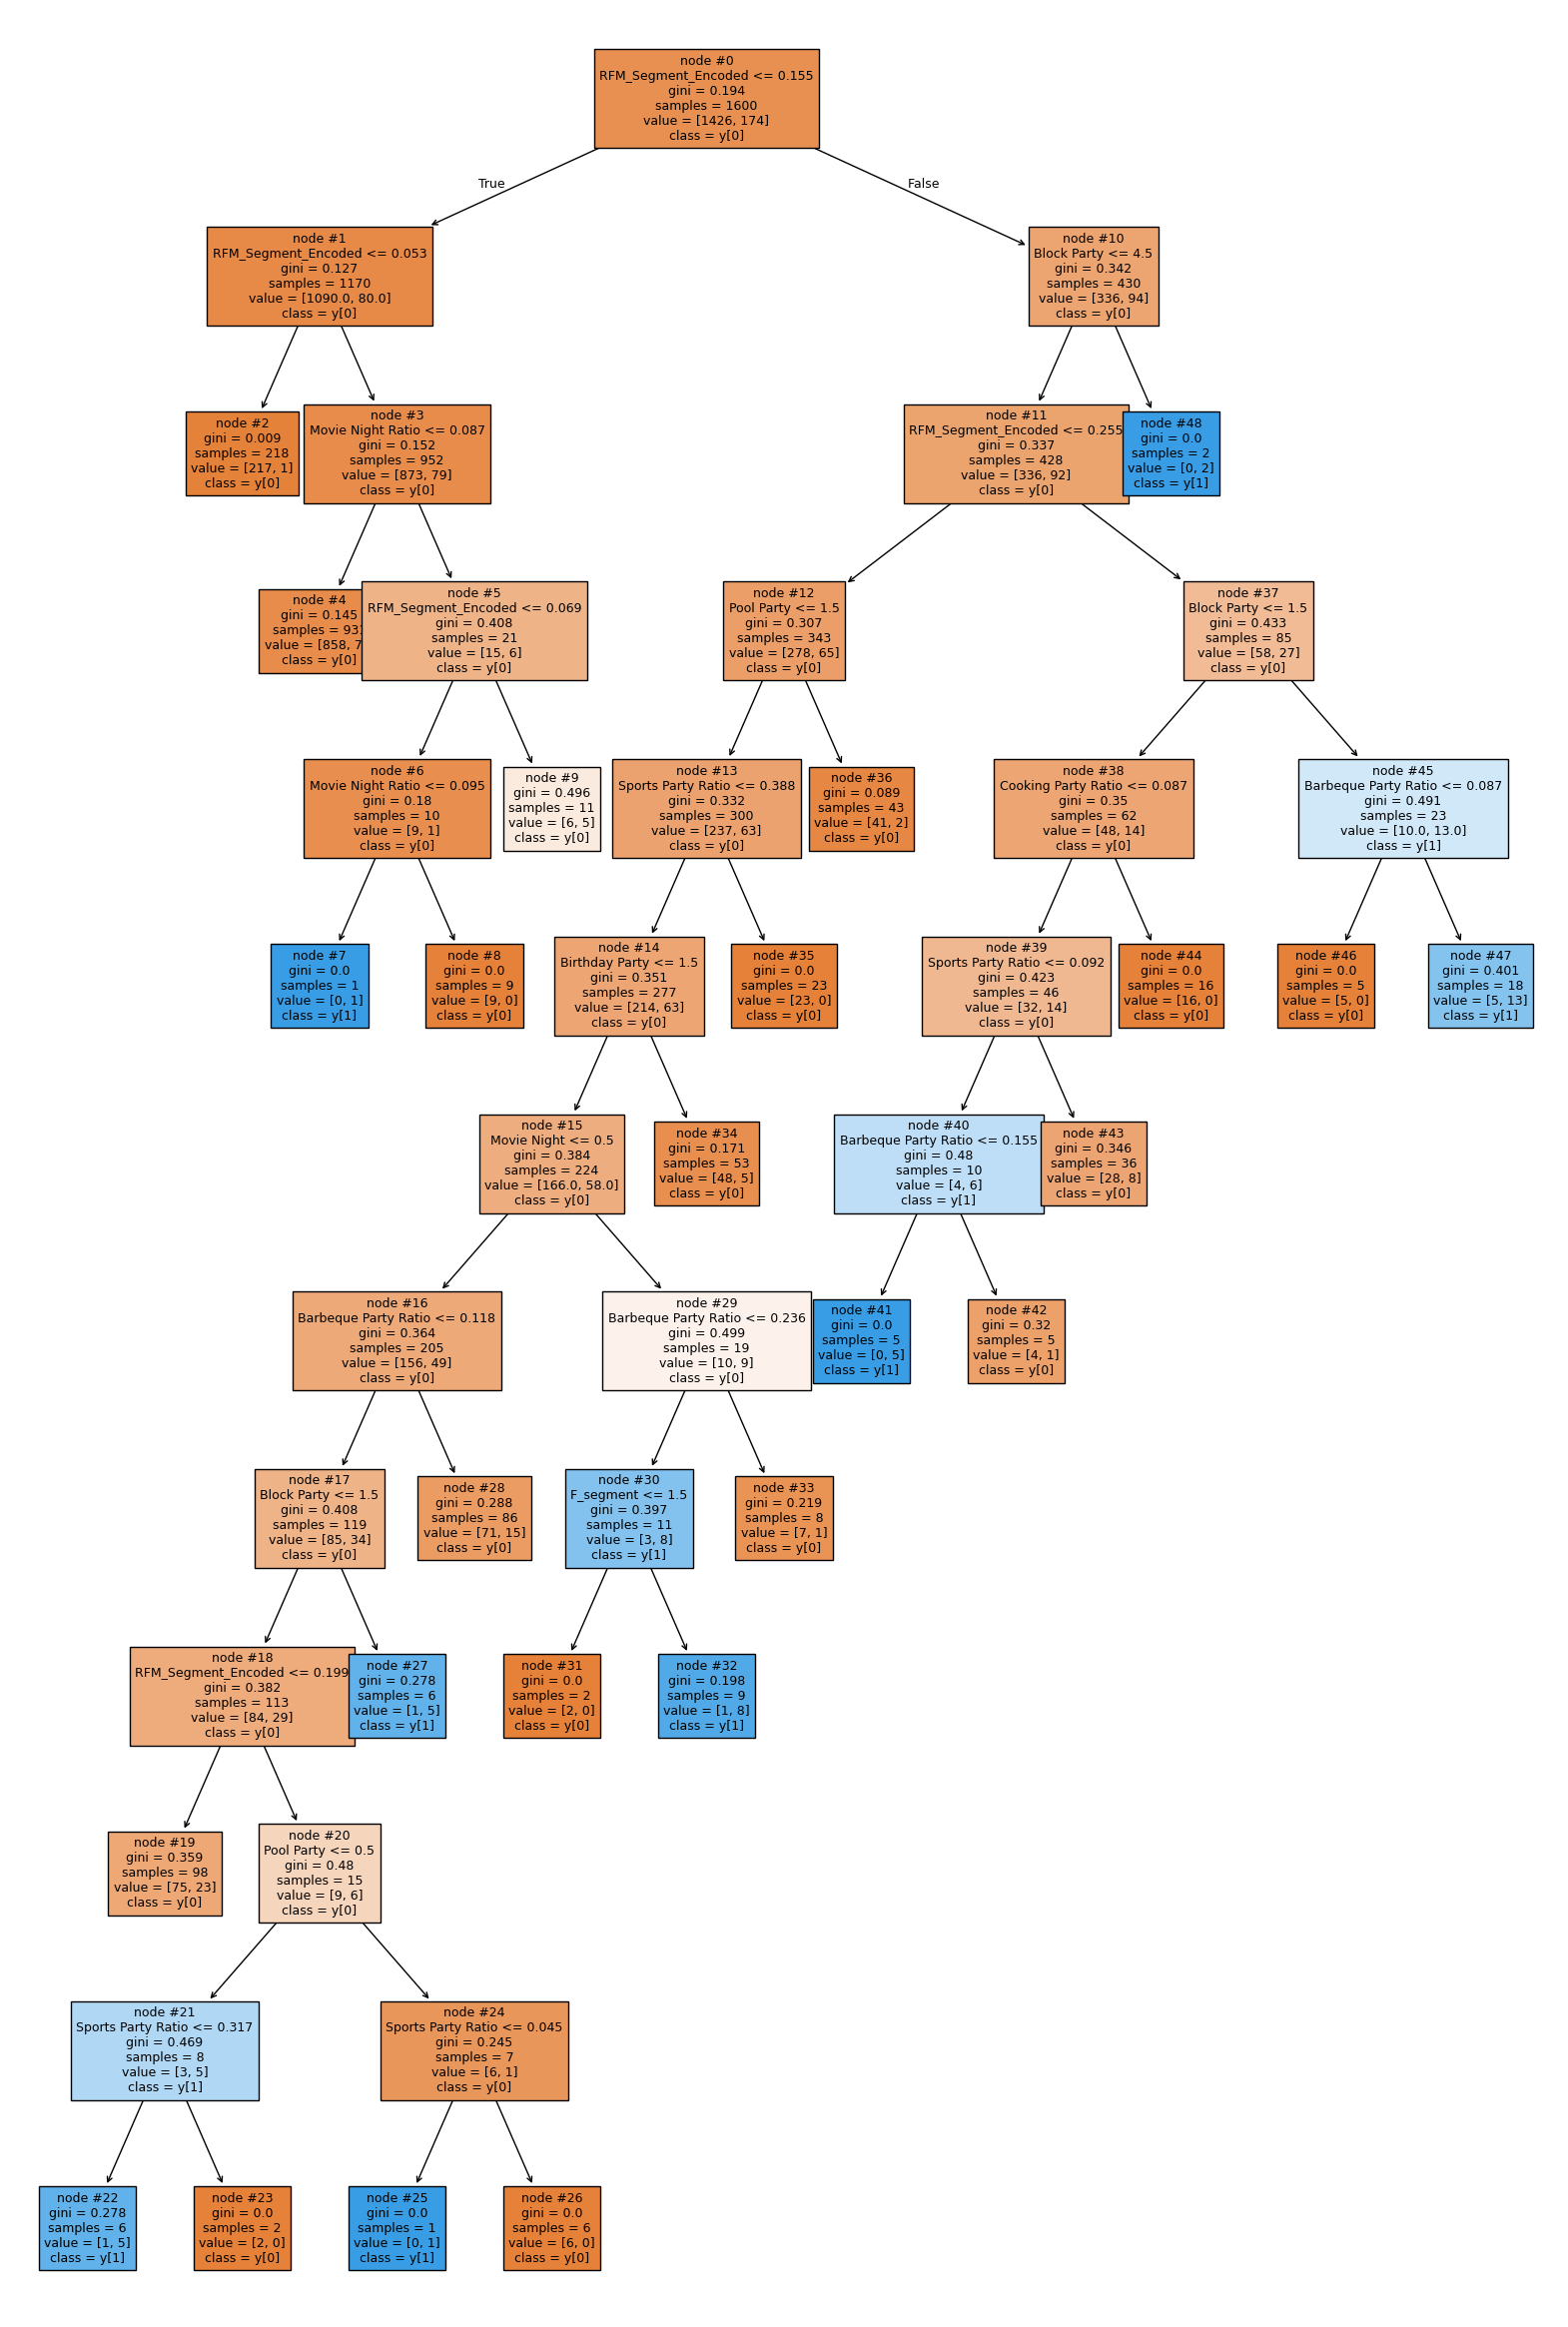

In [ ]:
show_tree(best_tree, X_train_eng.columns)

The variables selected for our optimal decision tree were variables such as 'RFM_Segment_Encoded', 'Block Party', 'Movie Night Ratio', 'Pool Party', 'Sports Party Ratio', 'Cooking Party Ratio', 'Barbecue Party Ratio', 'Birthday Party', 'Movie Night', 'Block Party', 'F_Segment'. The tree has 49 nodes, and 25 leaves. The tree has a depth of 12 and a height of 11 levels. Since our best model was found through post-pruning, the tree was pruned based on the cost complexity pruning parameter.

### b. Interpret R<sup>2</sup>  and how many splits did you have in the model?


- Note: R² measures the proportion of variance in the target variable that is explained by the model's predictions. This makes sense for continuous targets, where the goal is to minimize the difference between the predicted values and the actual values.
In classification, the target is categorical, and the goal is to correctly assign class labels. Metrics like accuracy, precision, recall, F1-score, and AUC-ROC are better suited because they focus on evaluating how well the predicted labels match the actual labels, or how well the predicted probabilities distinguish between classes.

In [ ]:
r_square(best_tree, X_train_eng, X_test_eng,y_train_eng, y_test_eng)
prediction_evaluation(best_tree, X_test_eng, y_test_eng)

Training r-square is 0.2166
Testing r-square is 0.0812


,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.12,0.465116,0.8150,0.281690,0.693766,"[[306, 51], [23, 20]]",882500.0
1,0.15,0.441860,0.8150,0.275362,0.693766,"[[307, 50], [24, 19]]",830625.0
2,0.2,0.302326,0.8400,0.276596,0.693766,"[[323, 34], [30, 13]]",569375.0
3,0.25,0.209302,0.9000,0.600000,0.693766,"[[351, 6], [34, 9]]",481875.0
4,Majority Vote,0.162791,0.8975,0.583333,0.693766,"[[352, 5], [36, 7]]",373125.0


Number of splits (nodes): 49
Number of leaves: 25


According to our code, training r-squared is 0.2166, while testing r-square is 0.0812. In terms of evaluation metrics, we sought to maximize recall to a reasonable level at the cost of precision. However, we understood that there needs to be a balance between recall and precision to achieve a desirable profit because just maximizing recall after a certain point proved to lower profits. We are focusing on recall because we want to minimize the false negatives in this buyer classification scenario.

### c. Examine each of the split variables to explain whether they make business sense?


RFM_Segment_Encoded     0.307172
Barbeque Party Ratio    0.176802
Block Party             0.150455
Sports Party Ratio      0.122470
Pool Party              0.055757
Movie Night Ratio       0.053062
F_segment               0.038487
Birthday Party          0.034561
Cooking Party Ratio     0.032732
Movie Night             0.028502
Cooking Party           0.000000
Get Together            0.000000
Get Together Ratio      0.000000
R_segment               0.000000
M_segment               0.000000
dtype: float64


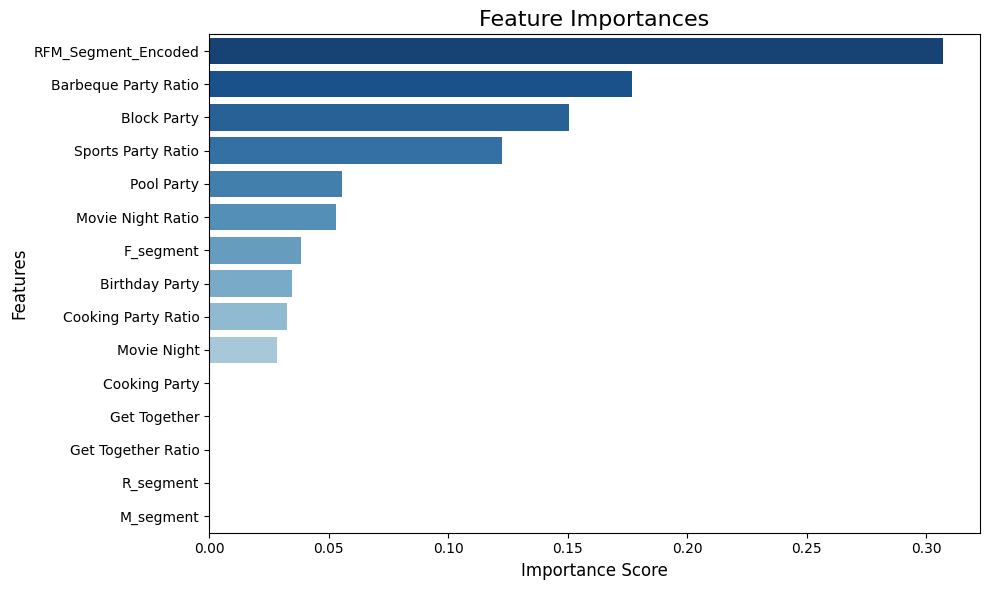

In [ ]:
visualize_split(best_tree, X_train_eng)

The first few split variables in the decision tree— RFM_Segment_Encoded, Block Party, and Movie Night Ratio- make strong business sense. Segmenting our customers by their respective RFM metrics proved to be an important variable as RFM contains crucial information about a customer's behavior. Customers may exhibit different purchasing behaviors based on the recency of a purchase, frequency of purchases indicates how much a customer engages with our business, and customers who spend more may engage in future purchases. Splitting on specific categories, such as Block Party purchases, also makes sense, as it reflects customer preferences and potential interest in related products like "Celebrating American Arts." These variables are common in customer behavior models, aligning well with standard business practices for predicting future purchases.

### d. Create the confusion matrix for the testing data set. (cutoff Prob. = 0.12)


Confusion Matrix for Training Data:
[[1227  199]
 [  81   93]]

Confusion Matrix for Testing Data:
[[306  51]
 [ 23  20]]


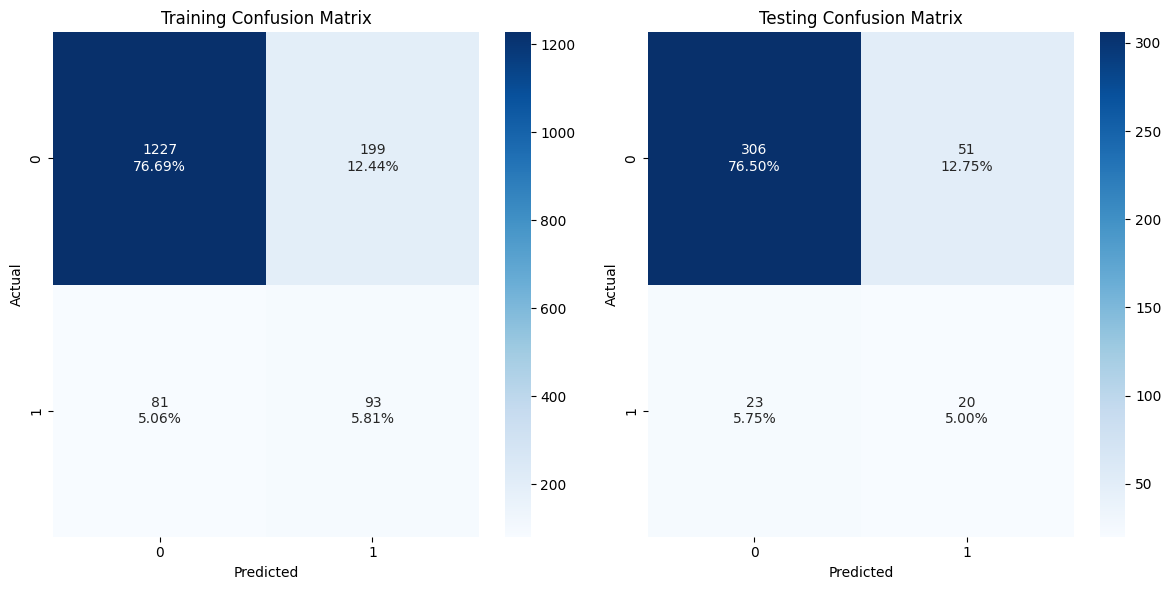

In [ ]:
make_confusion_matrix(best_tree, 0.12, X_train_eng, X_test_eng,y_train_eng, y_test_eng)

### e. What is the expected profit based on the confusion matrix for training and testing data sets (you can use the given profit calculator Excel Sheet)

In [ ]:
# The maximum total profit based on the training data (80% of all data) is $1176541
prediction_evaluation(best_tree, X_train_eng, y_train_eng, [0.12])

,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.12,0.534483,0.82500,0.318493,0.763064,"[[1227, 199], [81, 93]]",1.176541e+06
1,Majority Vote,0.229885,0.91125,0.833333,0.763064,"[[1418, 8], [134, 40]]",2.235000e+06


Number of splits (nodes): 49
Number of leaves: 25


In [ ]:
# The maximum total profit based on the test data (20% of all data) is $882500
prediction_evaluation(best_tree, X_test_eng, y_test_eng, [0.12])

,Cutoff,Recall,Accuracy,Precision,AUC_ROC,Confussion,Profit
0,0.12,0.465116,0.8150,0.281690,0.693766,"[[306, 51], [23, 20]]",882500.0
1,Majority Vote,0.162791,0.8975,0.583333,0.693766,"[[352, 5], [36, 7]]",373125.0


Number of splits (nodes): 49
Number of leaves: 25


# 5. Provide your business recommendations derived from your improved model

Based on the performance of our improved model on the test set, we recommend that SPW adopt the model to identify buyers and send targeted packages to increase profit. This approach could potentially yield an estimated six times higher profit compared to randomly sending 100,000 packages.

Additionally, for further implementation of the model, it is recommended to balance recall and precision, as our final improved model achieves a strong equilibrium between the two metrics, resulting in high profit. An imbalance towards either metric could lead to excessive losses or suboptimal profits.

Moreover, according to the feature importance graph, segmenting customers based on RFM analysis appears to be the most effective way to categorize them. Further research in this area could enable more targeted marketing and sales actions.

As for potential improvements to the model-- skewed variables could be transformed by being square-rooted, squared, or logged to see if distributions could be more normalized. This may lead to improvements in the model and help it perform better. In addition, other train/test split ratios could be explored to see how they would impact model performance.  